##import

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from math import pi
from scipy.fftpack import dct 
from scipy.signal.windows import gaussian, boxcar, triang, hamming

In [ ]:
def dft_shift(X):
    N = len(X)
    if (N % 2 == 0):
        # even-length: return N+1 values
        return np.arange(-int(N/2), int(N/2) + 1), np.concatenate((X[int(N/2):], X[:int(N/2)+1]))
    else:
        # odd-length: return N values
        return np.arange(-int((N-1)/2), int((N-1)/2) + 1), np.concatenate((X[int((N+1)/2):], X[:int((N+1)/2)]))

##**stationary signals vs non-stationary signals**

The difference between stationary and non-stationary signals is that the properties of a stationary process signal (frequncy ect.) do not change with time, while a Non-stationary signal is process is inconsistent with time 

In [ ]:
# stationary signal
n = np.arange(0,10000)
freq_stat = 10
N=len(n)

x_stat = np.cos((2*pi/N)*freq_stat*n)

# Non-stationary signal
freq_non_stat = 10*(n/500)
N=len(n)

x_non_stat = np.cos((2*pi/N)*freq_non_stat*n)

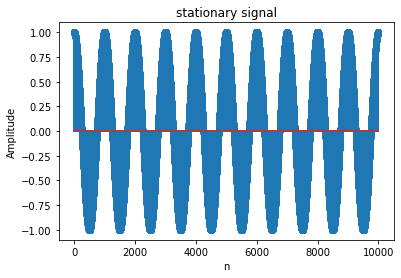

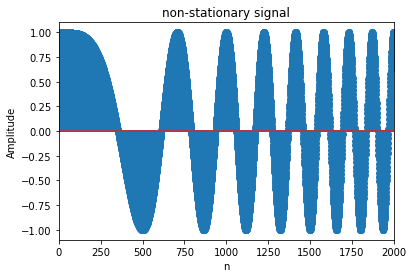

In [ ]:
# plot stationary vs non stationary signal
plt.stem(x_stat)
plt.title('stationary signal')
plt.ylabel('Amplitude')
plt.xlabel('n')
plt.show()


plt.stem(x_non_stat)
plt.title('non-stationary signal')
plt.ylabel('Amplitude')
plt.xlabel('n')
plt.xlim([0,2000])
plt.show()

## **fft on non-stationary signal**

In [ ]:
# fft
X = np.fft.fft(x_non_stat);

# calc magnitude
magnitude = np.sqrt(X * np.conj(X))
magnitude = magnitude/len(x_non_stat)

# calc imagenary part
imag_part = np.imag(X).copy()
mask_low_val = np.abs(imag_part) < 0.001
imag_part[mask_low_val] = 0
phase = np.arctan(imag_part/np.real(X))

# magnitude shift
n_magnitude, y_magnitude = dft_shift(magnitude)

# phase shift
n_phase, y_phase = dft_shift(phase)

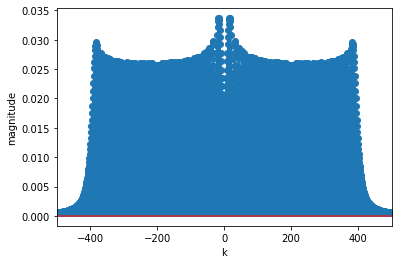

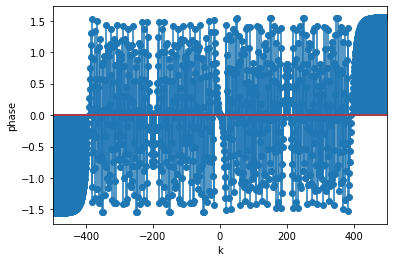

In [ ]:
plt.stem(n_magnitude, y_magnitude);
plt.xlim([-500, 500])
plt.ylabel('magnitude')
plt.xlabel('k')
plt.show()

plt.stem(n_phase, y_phase);
plt.xlim([-500, 500])
plt.ylabel('phase')
plt.xlabel('k')
plt.show()

##**Short-time Fourier transform**

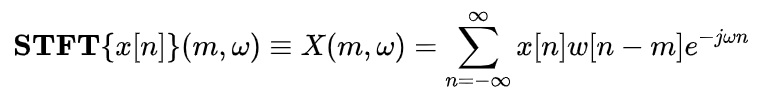

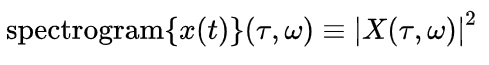

**implamentation of spectogram**

**framing**

In [ ]:
# framing

frame_length = int(x_non_stat.shape[0]/10) # 10, 100 , 1000
frames = np.reshape(x_non_stat, (-1, frame_length))

print("frame_length {}".format(frame_length))
print("frame shape {}".format(frames.shape))

frame_length 1000
frame shape (10, 1000)


**window**

**rectangular window**

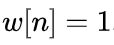

**triangle window**

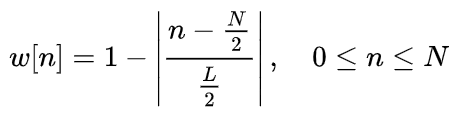

L can be N, N+1 or N+2

**gausian window**

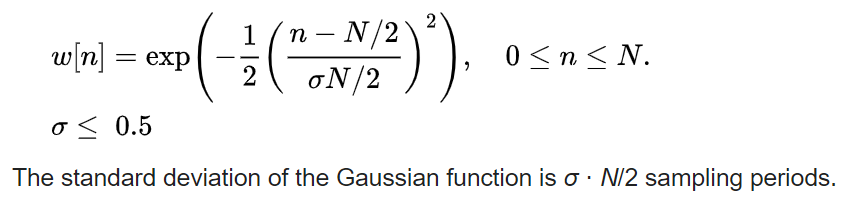

**hamming window**

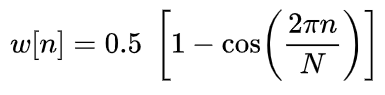

In [ ]:
# windowing
w_boxcar = boxcar(frame_length)
w_triang = triang(frame_length)

std_gaussian = 0.025*N/2
w_gaussian = gaussian(frame_length, std_gaussian)
w_hamming = hamming(frame_length)

windows size size 1000


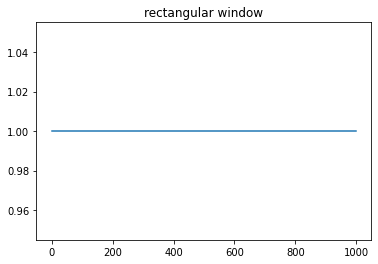

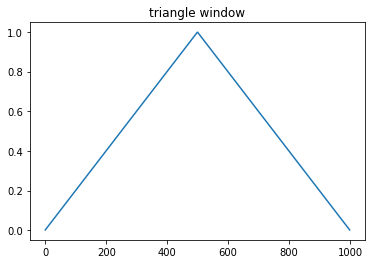

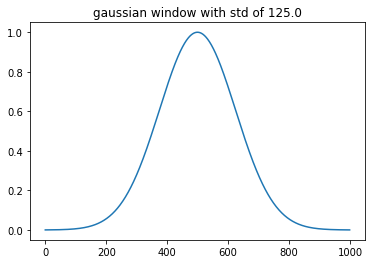

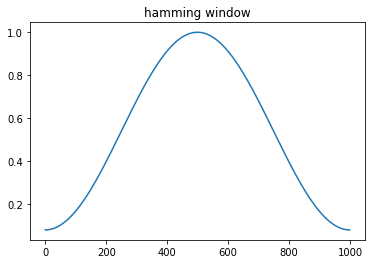

In [ ]:
print("windows size size {}".format(w_boxcar.shape[0]))

plt.title("rectangular window")
plt.plot(w_boxcar, '-')
plt.show()

plt.title("triangle window")
plt.plot(w_triang, '-')
plt.show()

plt.title("gaussian window with std of {}".format(std_gaussian))
plt.plot(w_gaussian, '-')
plt.show()

plt.title("hamming window")
plt.plot(w_hamming, '-')
plt.show()

In [ ]:
w = w_boxcar.copy()
chosen_frames = frames * w

**NFFT**

* Length of the transformed axis of the output.
* If n is smaller than the length of the input, the input is cropped.
* If it is larger, the input is padded with zeros. 
* If n is not given, the length of the input along the axis specified by axis is used.

In [ ]:
NFFT = 1048
spec_frames = np.absolute(np.fft.rfft(chosen_frames, NFFT))**2
spec_frames.shape

(10, 525)

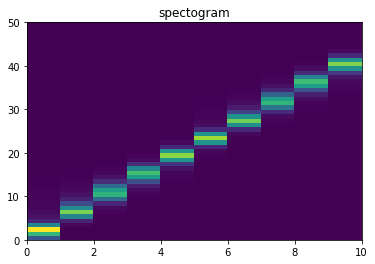

In [ ]:
plt.title("spectogram")
plt.pcolormesh(spec_frames.T)
plt.ylim([0,50])
plt.show()

**STFT: Influence of Window Function**

https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_STFT-Window.html

**Spectrogram: Effect of Window Type**

In [ ]:
# framing

# boxcar window
frames_boxcar = frames * w_boxcar

# triang window
frames_triang = frames * w_triang

# gaussian window
frames_gaussian = frames * w_gaussian

# hamming window
frames_hamming = frames * w_hamming

NFFT = 8096

# calc spec
spec_boxcar = np.absolute(np.fft.rfft(frames_boxcar, NFFT))**2
spec_triang = np.absolute(np.fft.rfft(frames_triang, NFFT))**2
spec_gaussian = np.absolute(np.fft.rfft(frames_gaussian, NFFT))**2
spec_hamming = np.absolute(np.fft.rfft(frames_hamming, NFFT))**2

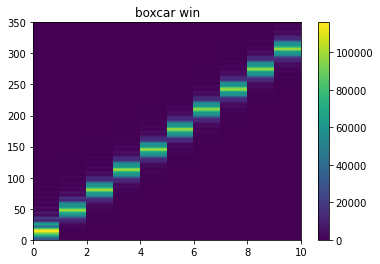

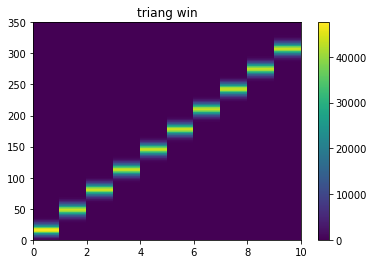

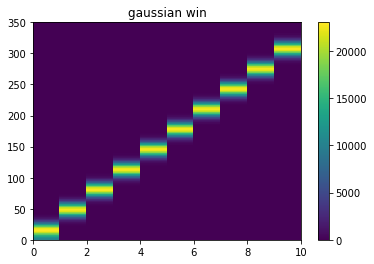

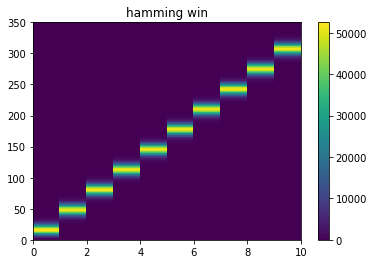

In [ ]:
plt.title("boxcar win")
plt.pcolormesh(spec_boxcar.T)
plt.ylim([0,350])
plt.colorbar()
plt.show()

plt.title("triang win")
plt.pcolormesh(spec_triang.T)
plt.ylim([0,350])
plt.colorbar()
plt.show()

plt.title("gaussian win")
plt.pcolormesh(spec_gaussian.T)
plt.ylim([0,350])
plt.colorbar()
plt.show()

plt.title("hamming win")
plt.pcolormesh(spec_hamming.T)
plt.ylim([0,350])
plt.colorbar()
plt.show()

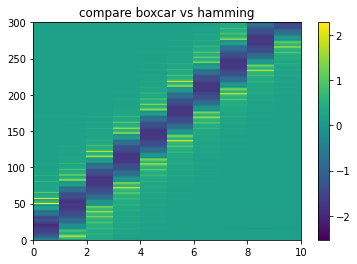

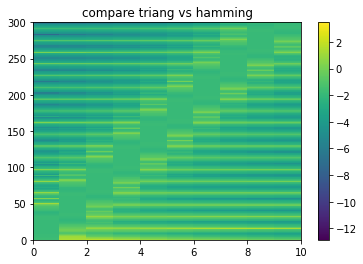

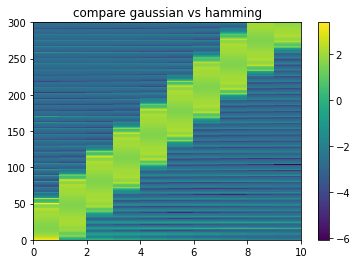

In [ ]:
plt.title("compare boxcar vs hamming")
spec_hamming_boxcar = np.log10(spec_boxcar.T/np.min(spec_boxcar.T)) - np.log10(spec_hamming.T/np.min(spec_hamming.T))
plt.pcolormesh(spec_hamming_boxcar)
plt.ylim([0,300])
plt.colorbar()
plt.show()


plt.title("compare triang vs hamming")
spec_hamming_triang = np.log10(spec_triang.T/np.min(spec_triang.T)) - np.log10(spec_hamming.T/np.min(spec_hamming.T))
plt.pcolormesh(spec_hamming_triang)
plt.ylim([0,300])
plt.colorbar()
plt.show()


plt.title("compare gaussian vs hamming")
spec_hamming_gaussian = np.log10(spec_gaussian.T/np.min(spec_gaussian.T)) - np.log10(spec_hamming.T/np.min(spec_hamming.T))
plt.pcolormesh(spec_hamming_gaussian)
plt.ylim([0,300])
plt.colorbar()
plt.show()

**Effect of window length**

In [ ]:
x_non_stat.shape[0]

10000

In [ ]:
x_non_stat.shape[0]/20

500.0

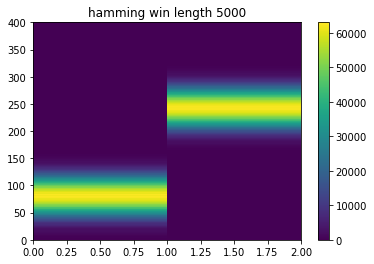

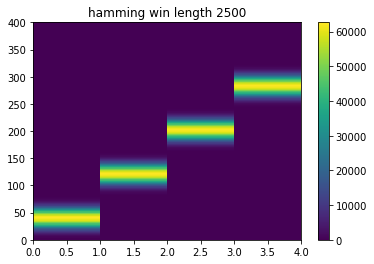

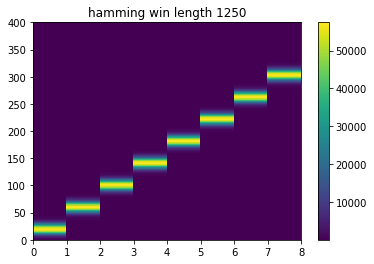

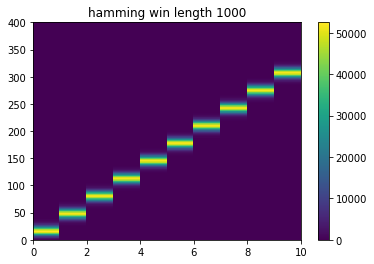

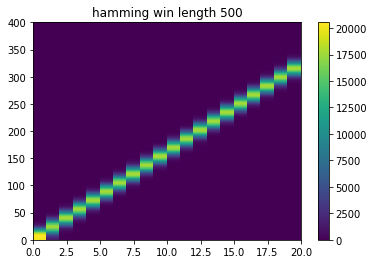

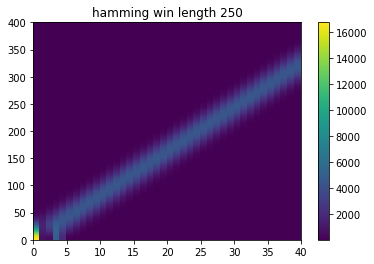

In [ ]:
for l in [5000, 2500, 1250, 1000, 500, 250]:
  # framing
  frame_length = int(l) # 10, 100 , 1000
  frames = np.reshape(x_non_stat, (-1, frame_length))

  # hamming window
  w_hamming = hamming(frame_length)
  frames_hamming = frames * w_hamming

  NFFT = 8096

  # calc spec
  spec_hamming = np.absolute(np.fft.rfft(frames_hamming, NFFT))**2

  # plot spectogram
  plt.title("hamming win length {}".format(frame_length))
  plt.pcolormesh(spec_hamming.T)
  plt.ylim([0,400])
  plt.colorbar()
  plt.show()

**hop_length**

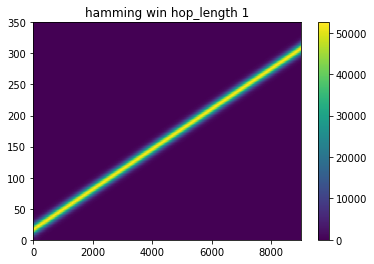

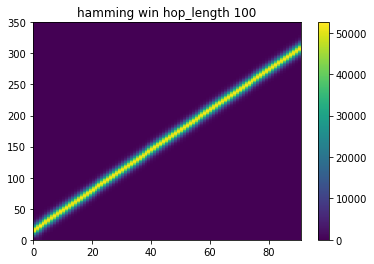

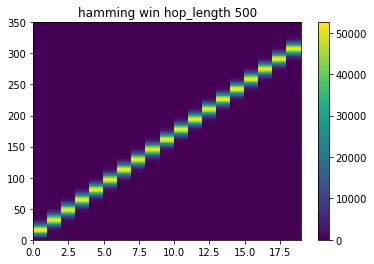

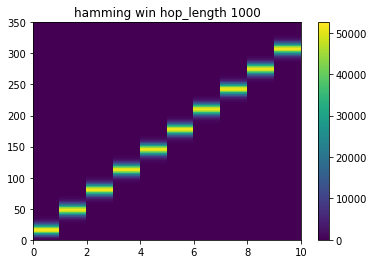

In [ ]:
NFFT = 8096

for hop_length in [1, 100, 500, 1000]:
  frame_length = int(x_non_stat.shape[0]/10)

  # framing
  frames = list()
  for i in range(0, x_non_stat.shape[0]-frame_length+hop_length,hop_length):
    frames.append(x_non_stat[i:i+frame_length])
  frames = np.array(frames)

  # hamming window
  w_hamming = hamming(frame_length)
  frames_hamming = frames * w_hamming

  # calc spec
  spec_hamming = np.absolute(np.fft.rfft(frames_hamming, NFFT))**2

  # plot spectogram
  plt.title("hamming win hop_length {}".format(hop_length))
  plt.pcolormesh(spec_hamming.T)
  plt.ylim([0,350])
  plt.colorbar()
  plt.show()

##**Spectrogram and Uncertainty**

https://glowingpython.blogspot.com/2011/09/uncertain-principle-and-spectrogram.html

* The Fourier transform does not give any information on the time at which a frequency component occurs. One approach which can give information on the time resolution of the spectrum is the Short Time Fourier Transform (STFT). 

* Here a moving window is applied to the signal and the Fourier transform is applied to the signal within the window as the window is moved [Ref]. The choice of window is very important with respect to the performance of the STFT in practice. 

* Since the STFT is simply applying the Fourier transform to pieces of the time series of interest, a drawback of the STFT is that it will not be able to resolve events if they happen to appear within the width of the window. In this case, the lack of time resolution of the Fourier transform is present. 

* In general, one cannot achieve simultaneous time and frequency resolution because of the Heisenberg uncertain principle. In the field of particle physics, an elementary particle does not have precise position and momentum. The better one determines the position of the particle, the less precisely is know at that time, and vice versa. 

* For signal processing, this rule translates into the fact that a signal does not simultaneously have a precise location in time and precise frequency [Ref].

**Example**

In [ ]:
sample_rate = 400 
T = 5 
t1 = np.linspace(0,5,int(T*(sample_rate)))[:-1] 
t2 = np.linspace(5,10,int(T*(sample_rate)))[:-1] 
t3 = np.linspace(10,15,int(T*(sample_rate)))[:-1] 
t4 = np.linspace(15,20,int(T*(sample_rate))) 

s1 = np.cos((2*pi)*10*t1)
s2 = np.cos((2*pi)*25*t2)
s3 = np.cos((2*pi)*50*t3)
s4 = np.cos((2*pi)*100*t4)

x_signal = np.hstack((s1,s2)) 
x_signal = np.hstack((x_signal.copy(), s3)) 
x_signal = np.hstack((x_signal.copy(), s4)) 

t = np.hstack((t1,t2)) 
t = np.hstack((t,t3)) 
t = np.hstack((t,t4)) 

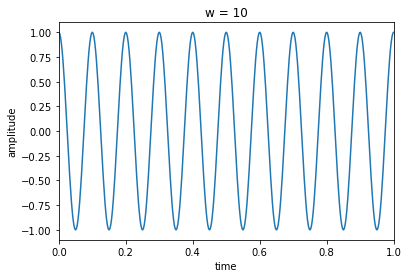

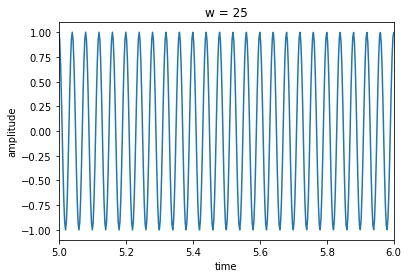

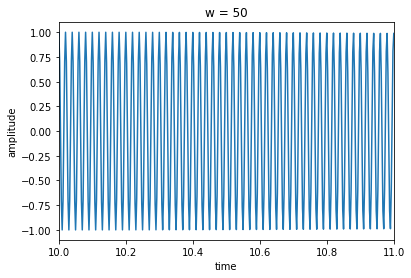

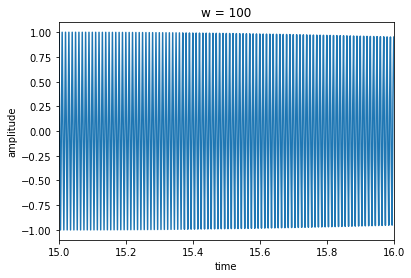

In [ ]:
w_list = [10, 25, 50, 100]
p=0
for i in range(0,20,5):
  plt.title('w = {}'.format(w_list[p]))
  plt.plot(t, x_signal,'-') 
  plt.xlim([i,i+1])
  plt.ylabel('amplitude')
  plt.xlabel('time')
  plt.show()
  p+=1

**Framing**

In [ ]:
def framming_hamm(x_signal, frame_size=2, frame_stride=0.01):
  # n_fft and stride_length (hop_length)
  #frame_size = 2 #0.025, 0.050, 0.080, 0.120, 0.200
  #frame_stride = 0.01 # 0.01

  frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
  signal_length = len(x_signal)
  frame_length = int(round(frame_length))
  frame_step = int(round(frame_step))
  num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

  pad_signal_length = num_frames * frame_step + frame_length
  z = np.zeros((pad_signal_length - signal_length))
  pad_signal = np.append(x_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

  indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T

  frames = pad_signal[indices.astype(np.int32, copy=False)]

  frames *= np.hamming(frame_length)
  return frames, frame_stride

**Change frame size**

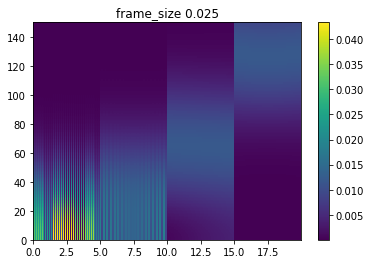

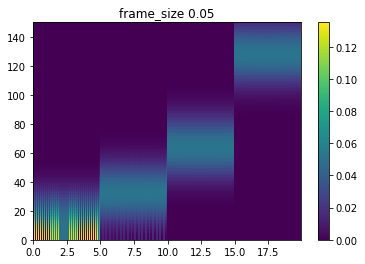

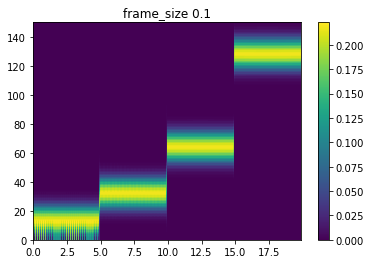

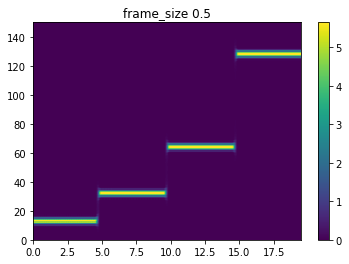

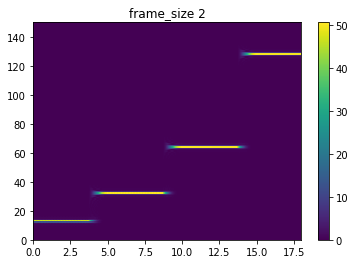

In [ ]:
frame_size_list = [0.025, 0.05, 0.1, 0.5, 2]
hop_length = 0.01
NFFT = 512

for frame_size in frame_size_list:
  frames, frame_stride = framming_hamm(x_signal, frame_size, hop_length)
  mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT 
  pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum  

  # plot Spectrogram
  time_scale = [i * frame_stride for i in range(pow_frames.shape[0])]
  freq_scale = [i for i in range(pow_frames.shape[1])]
  plt.title("frame_size {}".format(frame_size))
  plt.pcolormesh(time_scale,freq_scale, pow_frames.T)
  plt.ylim([0,150])
  plt.colorbar()
  plt.show()
  #[10, 25, 50, 100]

**Decibels**

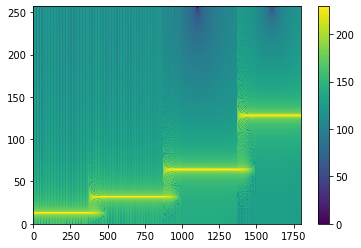

In [ ]:
pow_frames_db = 20 * np.log10(pow_frames/np.min(pow_frames))
plt.pcolormesh(pow_frames_db.T)
plt.colorbar()
#plt.ylim(80,140)
#[10, 25, 50, 100]

##**Mel scale and Mel-frequency Cepstral Coefficients (MFCCs)**

**Mel scale**

* The Mel scale relates perceived frequency, or pitch, of a pure tone to its actual measured frequency. 

* Humans are much better at discerning small changes in pitch at low frequencies than they are at high frequencies. 

* Incorporating this scale makes our features match more closely what humans hear

**MFCCs**

MFCCs are commonly derived as follows:

* Take the Fourier transform of (a windowed excerpt of) a signal.
* Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows.
* Take the logs of the powers at each of the mel frequencies.
* Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
* The MFCCs are the amplitudes of the resulting spectrum.

MFCCs are commonly used as features in speech recognition systems, such as the systems which can automatically recognize numbers spoken into a telephone.

**Implementation steps**


*   Frame the signal into 20-40 ms frames. 25ms is standard

*   Calculate Spectogram (power spectral)

*   Compute the Mel-spaced filterbank. This is a set of 20-40 (26 is standard) triangular filters that we apply to the periodogram power spectral estimate

*   Take the log of each of the 26 energies

*   Take the Discrete Cosine Transform (DCT) of the 26 log filterbank energies to give 26 cepstral coefficents. For ASR, only the lower 12-13 of the 26 coefficients are kept.



*   Mean Normalization









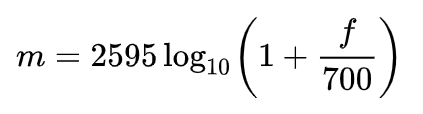

In [ ]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = np.floor((NFFT + 1) * hz_points / sample_rate)

fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * np.log10(filter_banks)  # dB

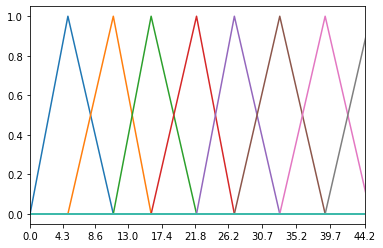

In [ ]:
for i in range(fbank.shape[0]):
  plt.plot(fbank[i])

plt.xticks(hz_points)
plt.xlim([0,hz_points[10]])
plt.show()

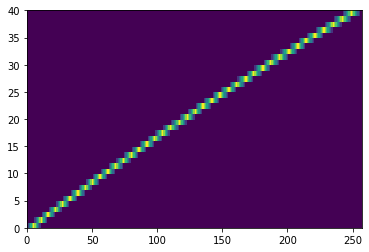

In [ ]:
plt.pcolormesh(fbank)
#plt.xlim([0,50])
#plt.ylim([0,10])

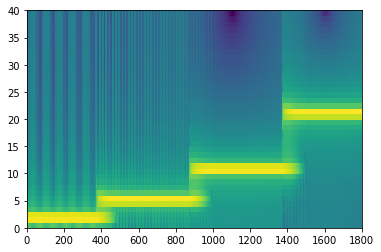

In [ ]:
plt.pcolormesh(filter_banks.T)
#plt.ylim([0,40])

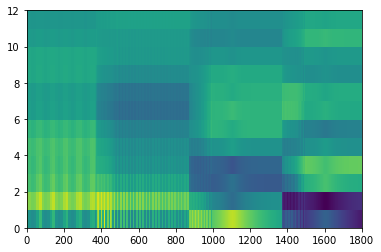

In [ ]:
num_ceps = 12
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13

plt.pcolormesh(mfcc.T)
#plt.ylim([0,15])

**Mean Normalization**

In [ ]:
filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
mfcc -= (np.mean(mfcc, axis=0) + 1e-8)

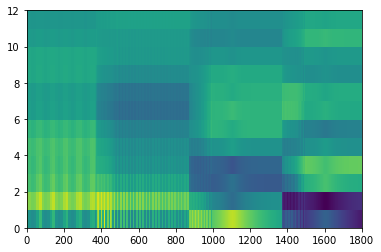

In [ ]:
plt.pcolormesh(mfcc.T)